# IMPORT

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pathlib import Path
import os
import pandas as pd
import seaborn as sns


# ĐỌC DỮ LIỆU

In [ ]:
PATH  = Path.cwd() / 'Data/Titanic.csv'
DATA = pd.read_csv(PATH)
DATA

In [ ]:
DATA.describe() 


# MÔ TẢ CÁC THUỘC TÍNH

1. PassengerID: Mã số hành khách
2. Survived: Sống sót (1) hoặc không (0)
3. Pclass: Hạng vé
4. Name: Họ tên
5. Sex: Giới tính
6. Age: Tuổi
7. SibSp: Số anh chị em/vợ chồng đi cùng
8. Parch: Số cha mẹ/con đi cùng
9. Ticket: Số vé
10. Fare: Giá vé
11. Cabin: Mã phòng
12. Embarked: Cảng lên tàu (S=Southampton, C=Cherbourg, Q=Queenstown)

# PHÂN TÍCH CÁC THUỘC TÍNH

In [4]:
print(DATA.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


**Phân loại thuộc tính:**

- Thuộc tính phân loại: Survived, Sex, Embarked
- Thuộc tính thứ bậc: Pclass
- Thuộc tính số liên tục: Age, Fare
- Thuộc tính số rời rạc: SibSp, Parch
- Thuộc tính hỗn hợp: Ticket, Cabin

Kiểm tra xem có thuộc tính nào bị lỗi hoặc thiếu giá trị không.

# DATA PREPROCESSING 

In [14]:
print("Missing Values per Column:")
print(DATA.isnull().sum())
print("------------------------------------")
print("Infinity Values per Column:")
print((DATA == np.inf).sum() + (DATA == -np.inf).sum())

Missing Values per Column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
------------------------------------
Infinity Values per Column:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


Có một số hành khách bị thiếu thông tin Age hoặc Cabin. Ta sẽ loại bỏ các dòng chứa giá trị thiếu để đảm bảo dữ liệu sạch.

In [ ]:

df_clean = DATA.dropna()
df_clean

# TRỰC QUAN HÓA MỐI TƯƠNG QUAN GIỮA CÁC THUỘC TÍNH SỐ

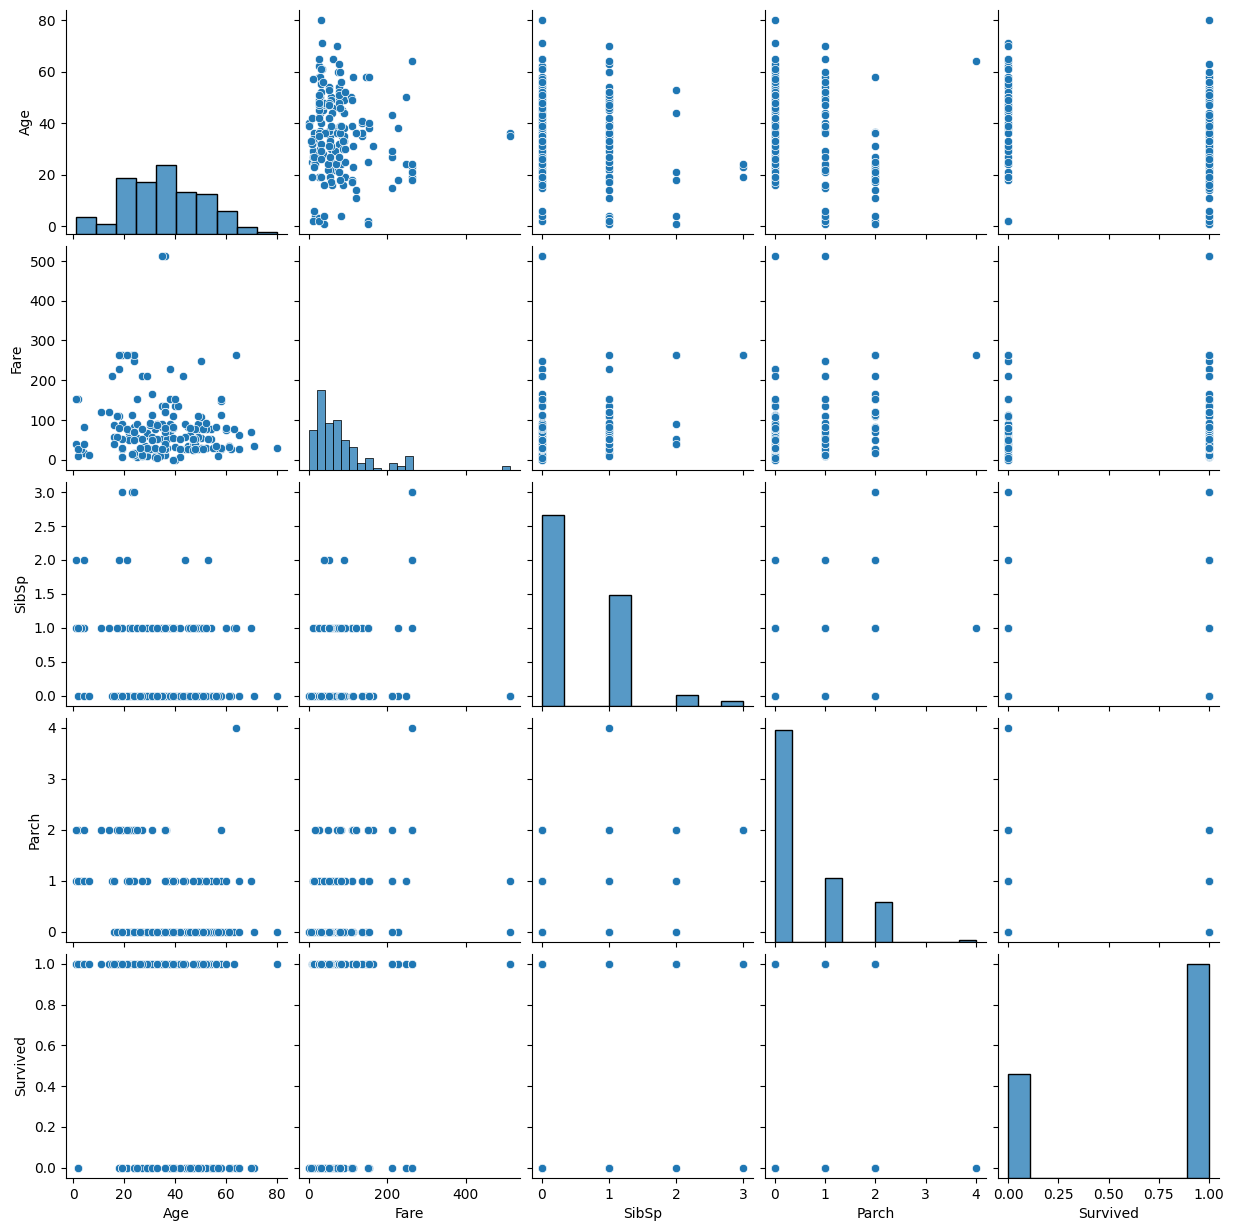

In [9]:
sns.pairplot(data = df_clean,vars=["Age", "Fare", "SibSp","Parch","Survived"])
plt.show()

In [ ]:
selected_columns = ['Age', 'Fare', 'SibSp', 'Parch', 'Survived']
corr = DATA[selected_columns].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f", square=True)
plt.title('Heatmap of Feature Correlations')
plt.show()

# PHÂN TÍCH DỮ LIỆU PHÂN LOẠI

In [ ]:
def bar_plot(variable):
    var = DATA[variable]
    varValue = var.value_counts()
    plt.figure(figsize=(8,3))
    plt.bar(varValue.index, varValue)
    plt.ylabel("Số lượng")
    plt.title(variable)
    plt.show()
    print(f"{variable}: \n{varValue}")

category1 = ["Sex", "Pclass", "Embarked", "SibSp", "Parch"]
for c in category1:
    bar_plot(c)

# PHÂN TÍCH DỮ LIỆU SỐ

In [ ]:
def plot_hist(variable):
    plt.figure(figsize=(8,3))
    plt.hist(DATA[variable], bins=50)
    plt.xlabel(variable)
    plt.ylabel("Tần suất")
    plt.title(f"Phân phối {variable}")
    plt.show()

numericVar = ["Fare", "Age", "PassengerId"]
for n in numericVar:
    plot_hist(n)

# PHÂN TÍCH TỶ LỆ SỐNG SÓT THEO TỪNG ĐẶC TRƯNG

In [13]:
print(DATA[["Pclass", "Survived"]].groupby(["Pclass"], as_index=False).mean())
print(DATA[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print(DATA[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print(DATA[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False))

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
      Sex  Survived
0  female  0.742038
1    male  0.188908
   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000


# NHẬN XÉT

- Hạng vé 1 có tỷ lệ sống sót cao nhất.
- Nữ giới có tỷ lệ sống sót vượt trội so với nam giới.
- Số lượng người thân đi cùng (SibSp, Parch) cũng ảnh hưởng đến khả năng sống sót.

# TÀI LIỆU THAM KHẢO

- https://www.kaggle.com/code/startupsci/titanic-data-science-solutions#Analyze-by-pivoting-features
- https://www.kaggle.com/code/kaganaslan/titanic-eda-data-analysis#Fill-Missing-Value
- https://machinelearningcoban.com/tabml_book/ch_data_processing/eda.html
- Nguồn dữ liệu: https://www.kaggle.com/datasets/yasserh/titanic-dataset